In [1]:
import h5py
import numpy as np
import pandas as pd 
import os
import numpy as np
import re
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [3]:
def convert_csv_to_txt(input_file,output_file):
   
    with open(input_file, 'r') as csv_file, open(output_file, 'w') as space_delimited_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader:
            space_delimited_file.write(' '.join(row) + '\n')

    print(f'CSV file "{input_file}" converted to space-delimited file "{output_file}"')



In [4]:

def read_file(file):
    hf = h5py.File(file, 'r')
    attributes = []
    for key in hf.keys():
        attributes.append(key)
    
    return attributes, hf


In [5]:
def get_data(hf,attributes):
    data = []
    pm = []
    acc_pm = []
    loss_pm = []
    loss_gm = []
    for i in range(len(attributes)):
        ai = hf.get(attributes[i])
        ai = np.array(ai)
        data.append(ai)
    
    return data

In [6]:
def plot_convergence(apriori_test_loss,
                    apriori_test_accuracy,
                    apriori_train_loss,
                    apriori_train_accuracy,
                    apriori_per_test_loss,
                    apriori_per_test_accuracy,
                    apriori_per_train_loss,
                    apriori_per_train_accuracy,
                    dynamic_test_loss,
                    dynamic_test_accuracy,
                    dynamic_train_loss,
                    dynamic_train_accuracy,
                    dynamic_per_test_loss,
                    dynamic_per_test_accuracy,
                    dynamic_per_train_loss,
                    dynamic_per_train_accuracy,
                    path
                    ):
        
        
        fig, ax = plt.subplots(1,4, figsize=(20,4))

        ax[0].plot(apriori_test_loss, label= "CCD(GM)", color='blue')
        ax[0].plot(dynamic_test_loss, label= "CMD(GM)", color='black')
        ax[0].plot(apriori_per_test_loss, label= "CCD(PM)", color='skyblue')
        ax[0].plot(dynamic_per_test_loss, label= "CMD(PM)", color='green')
        
        ax[0].set_xlabel("Global Iteration")
        ax[0].set_ylabel("Validation Loss")
        ax[0].set_xticks(range(0, 50, int(50/5)))
        #ax[0].legend(prop={"size":12})
        #ax[0].legend()
        #x1, x2, y1, y2 = 600, 800, 0.15, 2.0  # Adjust these values as needed
        #axins = inset_axes(ax[0], width="50%", height="50%", loc=7)
        #axins.plot(apriori_test_loss)
        #axins.plot(dynamic_test_loss)  
        #axins.set_xlim(x1, x2)
        #axins.set_ylim(y1, y2)
        #axins.indicate_inset_zoom(axins, edgecolor="black")

       # ax[1].plot(Fedavg_gd_test_accuracy, label= "FedAvg+GD")
        #ax[1].plot(Fedavg_sgd_test_accuracy, label= "FedAvg+SGD")
        ax[1].plot(apriori_test_accuracy, label= "CCD(GM)", color='blue')
        ax[1].plot(dynamic_test_accuracy, label= "CMD(GM)", color='black')
        ax[1].plot(apriori_per_test_accuracy, label= "CCD(PM)", color='skyblue')
        ax[1].plot(dynamic_per_test_accuracy, label= "CMD(PM)", color='green')
        ax[1].set_xlabel("Global Iteration")
        ax[1].set_xticks(range(0, 50, int(50/5)))
        ax[1].set_ylabel("Validation Accuracy")
        #ax[1].legend(prop={"size":12})
        #ax[1].legend()
        """x1, x2, y1, y2 = 600, 800, 0.8, 0.92  # Adjust these values as needed
        axins = inset_axes(ax[1], width="50%", height="50%", loc=7)
        axins.plot(Fedavg_test_accuracy)
        axins.plot(Fedprox_test_accuracy) 
        axins.plot(Fedmem_test_accuracy) 
        axins.set_xlim(x1, x2)
        axins.set_ylim(y1, y2)
        axins.indicate_inset_zoom(axins, edgecolor="black")
        """
        ax[2].plot(apriori_train_loss, label= "CCD(GM)", color='blue')
        ax[2].plot(dynamic_train_loss, label= "CMD(GM)", color='black')
        ax[2].plot(apriori_per_train_loss, label= "CCD(PM)", color='skyblue')
        ax[2].plot(dynamic_per_train_loss, label= "CMD(PM)", color='green')
        ax[2].set_xlabel("Global Iteration")
        #ax[2].set_xscale('log')
        ax[2].set_ylabel("Training Loss")
        #ax[2].set_yscale('log')
        ax[2].set_xticks(range(0, 50, int(50/5)))
        #ax[2].legend(prop={"size":12})
        #ax[2].legend()
        """x1, x2, y1, y2 = 600, 800, 0.1, 0.55  # Adjust these values as needed
        axins = inset_axes(ax[2], width="50%", height="50%", loc=7)
        axins.plot(Fedavg_train_loss, label="FedAvg")
        axins.plot(Fedprox_train_loss, label= "FedProx")
        axins.plot(Fedmem_train_loss, label= "FedMEM(PM)")
        axins.set_xlim(x1, x2)
        axins.set_ylim(y1, y2)
        axins.indicate_inset_zoom(axins, edgecolor="black")
        """
        # ax[3].plot(Fedavg_gd_train_accuracy, label= "FedAvg+GD")
        #ax[3].plot(Fedavg_sgd_train_accuracy, label= "FedAvg+SGD")
        ax[3].plot(apriori_train_accuracy, label= "CCD(GM)", color='blue')
        ax[3].plot(dynamic_train_accuracy, label= "CMD(GM)", color='black')
        ax[3].plot(apriori_per_train_accuracy, label= "CCD(PM)", color='skyblue')
        ax[3].plot(dynamic_per_train_accuracy, label= "CMD(PM)",color='green')
        ax[3].set_xlabel("Global Iteration")
        ax[3].set_ylabel("Training Accuracy")
        ax[3].set_xticks(range(0, 50, int(50/5)))
        #ax[3].legend(prop={"size":12})
        #ax[3].legend()

        """
        x1, x2, y1, y2 = 600, 800, 0.8, 0.98  # Adjust these values as needed
        axins = inset_axes(ax[3], width="50%", height="50%", loc=7)
        axins.plot(Fedavg_train_accuracy)
        axins.plot(Fedprox_train_accuracy) 
        axins.plot(Fedmem_train_accuracy) 
        axins.set_xlim(x1, x2)
        axins.set_ylim(y1, y2)
        axins.indicate_inset_zoom(axins, edgecolor="black")
        """
        handles, labels = ax[3].get_legend_handles_labels()
        fig.legend(handles, labels, loc='upper center', ncol=4, fontsize=12)


        plt.draw()
       
        plt.savefig(path +'convergence.png')

        # Show the graph
        plt.show()


In [10]:
def plot_precision_recall_f1(apriori_precision, 
                            apriori_recall, 
                            apriori_f1, 
                            apriori_per_precision, 
                            apriori_per_recall, 
                            apriori_per_f1,
                            dynamic_precision, 
                            dynamic_recall, 
                            dynamic_f1,
                            dynamic_per_precision, 
                            dynamic_per_recall, 
                            dynamic_per_f1,
                            path):
    
    fig, ax = plt.subplots(1,3, figsize=(20,4))

    ax[0].plot(apriori_precision, label= "CCD(GM)", color='blue')
    ax[0].plot(dynamic_precision, label= "CMD(GM)", color='black')
    ax[0].plot(apriori_per_precision, label= "CCD(PM)", color='skyblue')
    ax[0].plot(dynamic_per_precision, label= "CMD(PM)", color='green')
        
    ax[0].set_xlabel("Global Iteration")
    ax[0].set_ylabel("Precision")
    ax[0].set_xticks(range(0, 50, int(50/5)))


    ax[1].plot(apriori_recall, label= "CCD(GM)", color='blue')
    ax[1].plot(dynamic_recall, label= "CMD(GM)", color='black')
    ax[1].plot(apriori_per_recall, label= "CCD(PM)", color='skyblue')
    ax[1].plot(dynamic_per_recall, label= "CMD(PM)", color='green')
        
    ax[1].set_xlabel("Global Iteration")
    ax[1].set_ylabel("Recall")
    ax[1].set_xticks(range(0, 50, int(50/5)))

    ax[2].plot(apriori_f1, label= "CCD(GM)", color='blue')
    ax[2].plot(dynamic_f1, label= "CMD(GM)", color='black')
    ax[2].plot(apriori_per_f1, label= "CCD(PM)", color='skyblue')
    ax[2].plot(dynamic_per_f1, label= "CMD(PM)", color='green')
        
    ax[2].set_xlabel("Global Iteration")
    ax[2].set_ylabel("F1-score")
    ax[2].set_xticks(range(0, 50, int(50/5)))
        
    handles, labels = ax[2].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=4, fontsize=12)


    plt.draw()
       
    plt.savefig(path +'precision_recall_f1.png')

    # Show the graph
    plt.show()


In [8]:
def convergence_analysis(path, acc_file, loss_file):
    dir_list = os.listdir(path)
    
    apriori_test_loss = []
    apriori_test_accuracy = []
    apriori_train_loss = []
    apriori_train_accuracy = []
    apriori_precision = []
    apriori_recall = []
    apriori_f1 = []

    

    
    dynamic_test_loss = []
    dynamic_test_accuracy = []
    dynamic_train_loss = []
    dynamic_train_accuracy = []

    dynamic_precision = []
    dynamic_recall = []
    dynamic_f1 = []


    apriori_per_test_loss = []
    apriori_per_test_accuracy = []
    apriori_per_train_loss = []
    apriori_per_train_accuracy = []

    apriori_per_precision = []
    apriori_per_recall = []
    apriori_per_f1 = []

    
    dynamic_per_test_loss = []
    dynamic_per_test_accuracy = []
    dynamic_per_train_loss = []
    dynamic_per_train_accuracy = []

    dynamic_per_precision = []
    dynamic_per_recall = []
    dynamic_per_f1 = []

    random_test_loss = []
    random_test_accuracy = []
    random_train_loss = []
    random_train_accuracy = []

    for file_name in dir_list:
        if file_name in ['apriori.h5','dynamic.h5']:
            print(file_name)
            attributes, hf = read_file(path+file_name)

            data = get_data(hf,attributes)
            #id=0
            for key in hf.keys():
                attributes.append(key)
                # print("id [",id,"] :", key)
                #id+=1
            train_loss = hf.get('global_train_loss')
            train_acc = hf.get('global_train_accuracy')   
            val_loss = hf.get('global_test_loss')
            val_acc = hf.get('global_test_accuracy')
            precision = hf.get('global_precision')
            recall = hf.get('global_recall')
            f1 = hf.get('global_f1score')

            per_train_loss = hf.get('per_train_loss')
            per_train_acc = hf.get('per_train_accuracy')   
            per_val_loss = hf.get('per_test_loss')
            per_val_acc = hf.get('per_test_accuracy')
            per_precision = hf.get('per_precision')
            per_recall = hf.get('per_recall')
            per_f1 = hf.get('per_f1score')

            if file_name == "apriori.h5":
                apriori_train_loss.append(np.array(train_loss).tolist())
                apriori_train_accuracy.append(np.array(train_acc).tolist())
                apriori_test_loss.append(np.array(val_loss).tolist())
                apriori_test_accuracy.append(np.array(val_acc).tolist())
                apriori_per_train_loss.append(np.array(per_train_loss).tolist())
                apriori_per_train_accuracy.append(np.array(per_train_acc).tolist())
                apriori_per_test_loss.append(np.array(per_val_loss).tolist())
                apriori_per_test_accuracy.append(np.array(per_val_acc).tolist())

                apriori_precision.append(np.array(precision).tolist())
                apriori_recall.append(np.array(recall).tolist())
                apriori_f1.append(np.array(f1).tolist())


                apriori_per_precision.append(np.array(per_precision).tolist())
                apriori_per_recall.append(np.array(per_recall).tolist())
                apriori_per_f1.append(np.array(per_f1).tolist())

                    # print(Fedavg_train_loss)
            elif file_name == "dynamic.h5":

                dynamic_train_loss.append(np.array(train_loss).tolist())
                dynamic_train_accuracy.append(np.array(train_acc).tolist())
                dynamic_test_loss.append(np.array(val_loss).tolist())
                dynamic_test_accuracy.append(np.array(val_acc).tolist())
                dynamic_per_train_loss.append(np.array(per_train_loss).tolist())
                dynamic_per_train_accuracy.append(np.array(per_train_acc).tolist())
                dynamic_per_test_loss.append(np.array(per_val_loss).tolist())
                dynamic_per_test_accuracy.append(np.array(per_val_acc).tolist())

                dynamic_precision.append(np.array(precision).tolist())
                dynamic_recall.append(np.array(recall).tolist())
                dynamic_f1.append(np.array(f1).tolist())


                dynamic_per_precision.append(np.array(per_precision).tolist())
                dynamic_per_recall.append(np.array(per_recall).tolist())
                dynamic_per_f1.append(np.array(per_f1).tolist())
        
            
    train_loss = {
        'GR' : np.arange(50),
        'apriori_g' : apriori_train_loss[0][:],
        'dynamic_g' : dynamic_train_loss[0][:],
        'apriori_p' : apriori_per_train_loss[0][:],
        'dynamic_p' : dynamic_per_train_loss[0][:]
    }

    train_acc = {
        'GR' : np.arange(50),
        'apriori_g' : apriori_train_accuracy[0][:],
        'dynamic_g' : dynamic_train_accuracy[0][:],
        'apriori_p' : apriori_per_train_accuracy[0][:],
        'dynamic_p' : dynamic_per_train_accuracy[0][:]
    }


    val_loss = {
        'GR' : np.arange(50),
        'apriori_g' : apriori_test_loss[0][:],
        'dynamic_g' : dynamic_test_loss[0][:],
        'apriori_p' : apriori_per_test_loss[0][:],
        'dynamic_p' : dynamic_per_test_loss[0][:]
    }


    val_acc = {
        'GR' : np.arange(50),
        'apriori_g' : apriori_test_accuracy[0][:],
        'dynamic_g' : dynamic_test_accuracy[0][:],
        'apriori_p' : apriori_per_test_accuracy[0][:],
        'dynamic_p' : dynamic_per_test_accuracy[0][:]
    }

    precision = {

        'GR' : np.arange(50),
        'apriori_g' : apriori_precision[0][:],
        'dynamic_g' : dynamic_precision[0][:],
        'apriori_p' : apriori_per_precision[0][:],
        'dynamic_p' : dynamic_per_precision[0][:]

    }

    recall = {

        'GR' : np.arange(50),
        'apriori_g' : apriori_recall[0][:],
        'dynamic_g' : dynamic_recall[0][:],
        'apriori_p' : apriori_per_recall[0][:],
        'dynamic_p' : dynamic_per_recall[0][:]

    }

    f1 = {

        'GR' : np.arange(50),
        'apriori_g' : apriori_f1[0][:],
        'dynamic_g' : dynamic_f1[0][:],
        'apriori_p' : apriori_per_f1[0][:],
        'dynamic_p' : dynamic_per_f1[0][:]

    }

    
    df_train_loss = pd.DataFrame(train_loss)
    df_train_acc = pd.DataFrame(train_acc)
    df_val_loss = pd.DataFrame(val_loss)
    df_val_acc = pd.DataFrame(val_acc)

    df_precision = pd.DataFrame(precision)
    df_recall = pd.DataFrame(recall)
    df_f1 = pd.DataFrame(f1)



    csv_train_acc_path = path + "train_" + acc_file +".csv"
    csv_train_loss_path = path + "train_" + loss_file +".csv"
    csv_val_acc_path = path + "test_" + acc_file +".csv"
    csv_val_loss_path = path + "test_" +loss_file +".csv"
    
    csv_precision_path = path + "precision.csv"
    csv_recall_path = path + "recall.csv"
    csv_f1_path = path + "f1.csv"
    
    
    txt_train_acc_path = path + "train_" + acc_file +".txt"
    txt_train_loss_path = path +  "train_" + loss_file +".txt"
    txt_val_acc_path = path + "test_" + acc_file +".txt"
    txt_val_loss_path = path + "test_" + loss_file +".txt"

    txt_precision_path = path + "precision.txt"
    txt_recall_path = path + "recall.txt"
    txt_f1_path = path + "f1.txt"

    df_train_acc.to_csv(csv_train_acc_path, index=False)
    df_train_loss.to_csv(csv_train_loss_path, index=False)
    df_val_acc.to_csv(csv_val_acc_path, index=False)
    df_val_loss.to_csv(csv_val_loss_path, index=False)
    df_precision.to_csv(csv_precision_path, index=False)
    df_recall.to_csv(csv_recall_path, index=False)
    df_f1.to_csv(csv_f1_path, index=False)
    
    convert_csv_to_txt(csv_train_acc_path,txt_train_acc_path)
    convert_csv_to_txt(csv_train_loss_path,txt_train_loss_path)
    convert_csv_to_txt(csv_val_acc_path,txt_val_acc_path)
    convert_csv_to_txt(csv_val_loss_path,txt_val_loss_path)
    
    convert_csv_to_txt(csv_precision_path,txt_precision_path)
    convert_csv_to_txt(csv_recall_path,txt_recall_path)
    convert_csv_to_txt(csv_f1_path,txt_f1_path)

    plot_convergence(apriori_test_loss[0],
                    apriori_test_accuracy[0],
                    apriori_train_loss[0],
                    apriori_train_accuracy[0],
                    apriori_per_test_loss[0],
                    apriori_per_test_accuracy[0],
                    apriori_per_train_loss[0],
                    apriori_per_train_accuracy[0],
                    dynamic_test_loss[0],
                    dynamic_test_accuracy[0],
                    dynamic_train_loss[0],
                    dynamic_train_accuracy[0],
                    dynamic_per_test_loss[0],
                    dynamic_per_test_accuracy[0],
                    dynamic_per_train_loss[0],
                    dynamic_per_train_accuracy[0],
                    path)

    plot_precision_recall_f1(apriori_precision[0], apriori_recall[0], apriori_f1[0], apriori_per_precision[0], apriori_per_recall[0], apriori_per_f1[0],
                             dynamic_precision[0], dynamic_recall[0], dynamic_f1[0], dynamic_per_precision[0], dynamic_per_recall[0], dynamic_per_f1[0],
                             path)


Mem_s or A1 = 3

dynamic.h5
apriori.h5
CSV file "/proj/sourasb-220503/FedMEM/results/convergence/cluster_type/train_accuracy.csv" converted to space-delimited file "/proj/sourasb-220503/FedMEM/results/convergence/cluster_type/train_accuracy.txt"
CSV file "/proj/sourasb-220503/FedMEM/results/convergence/cluster_type/train_loss.csv" converted to space-delimited file "/proj/sourasb-220503/FedMEM/results/convergence/cluster_type/train_loss.txt"
CSV file "/proj/sourasb-220503/FedMEM/results/convergence/cluster_type/test_accuracy.csv" converted to space-delimited file "/proj/sourasb-220503/FedMEM/results/convergence/cluster_type/test_accuracy.txt"
CSV file "/proj/sourasb-220503/FedMEM/results/convergence/cluster_type/test_loss.csv" converted to space-delimited file "/proj/sourasb-220503/FedMEM/results/convergence/cluster_type/test_loss.txt"
CSV file "/proj/sourasb-220503/FedMEM/results/convergence/cluster_type/precision.csv" converted to space-delimited file "/proj/sourasb-220503/FedMEM/results/convergence/c

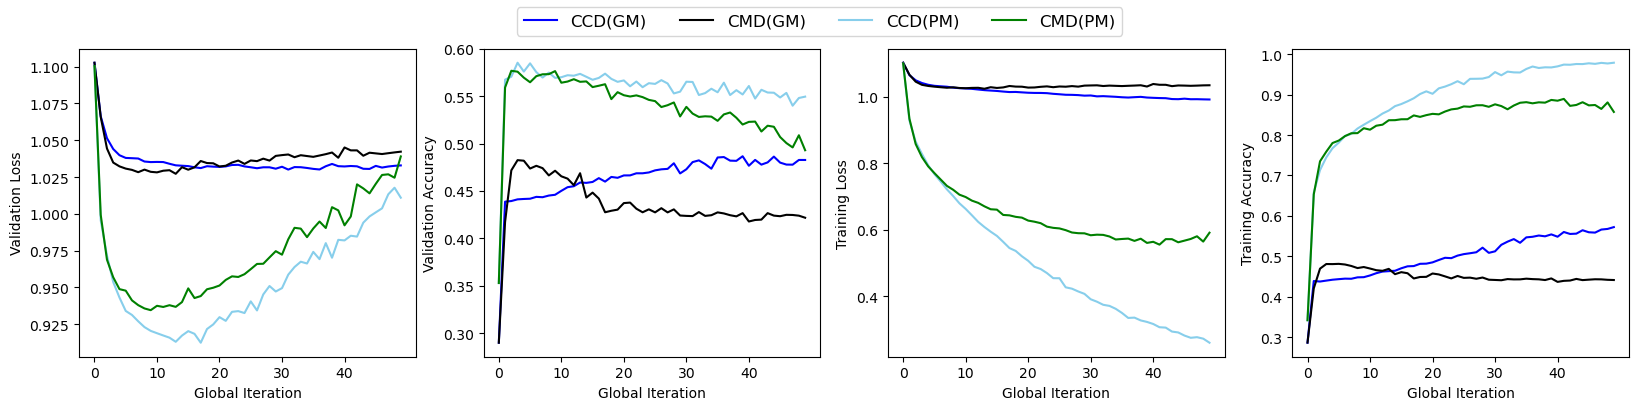

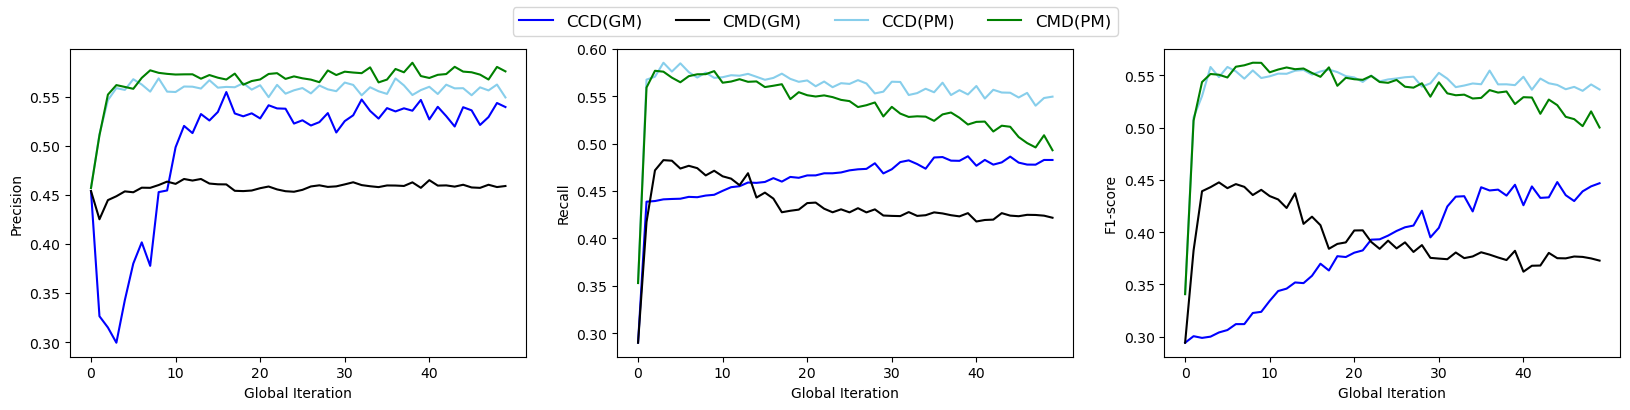

In [11]:
path = "/proj/sourasb-220503/FedMEM/results/convergence/cluster_type/"
acc_file = "accuracy"
loss_file = "loss"

convergence_analysis(path, acc_file, loss_file)


Mem_s = 10

dynamic.h5
apriori.h5
CSV file "/proj/sourasb-220503/FedMEM/results/convergence/cluster_type/10/train_accuracy.csv" converted to space-delimited file "/proj/sourasb-220503/FedMEM/results/convergence/cluster_type/10/train_accuracy.txt"
CSV file "/proj/sourasb-220503/FedMEM/results/convergence/cluster_type/10/train_loss.csv" converted to space-delimited file "/proj/sourasb-220503/FedMEM/results/convergence/cluster_type/10/train_loss.txt"
CSV file "/proj/sourasb-220503/FedMEM/results/convergence/cluster_type/10/test_accuracy.csv" converted to space-delimited file "/proj/sourasb-220503/FedMEM/results/convergence/cluster_type/10/test_accuracy.txt"
CSV file "/proj/sourasb-220503/FedMEM/results/convergence/cluster_type/10/test_loss.csv" converted to space-delimited file "/proj/sourasb-220503/FedMEM/results/convergence/cluster_type/10/test_loss.txt"
CSV file "/proj/sourasb-220503/FedMEM/results/convergence/cluster_type/10/precision.csv" converted to space-delimited file "/proj/sourasb-220503/F

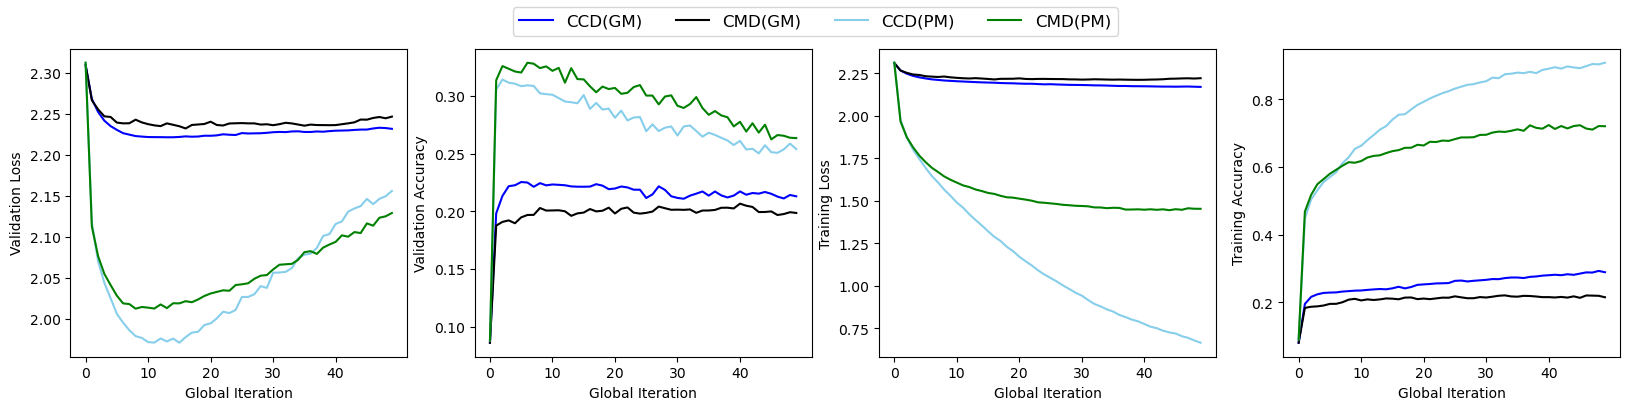

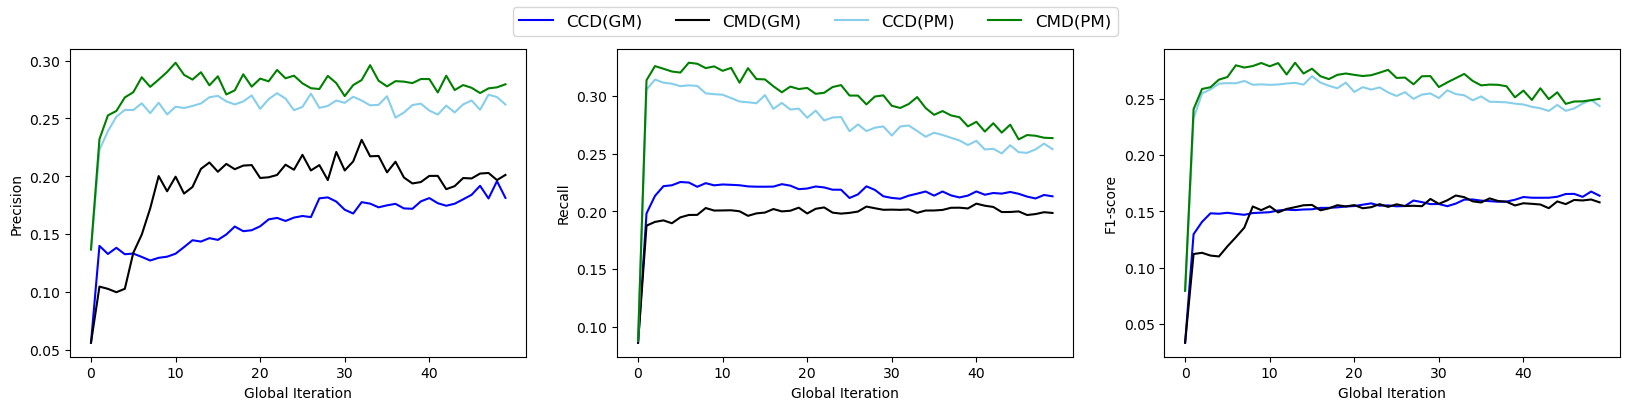

In [12]:
path = "/proj/sourasb-220503/FedMEM/results/convergence/cluster_type/10/"
acc_file = "accuracy"
loss_file = "loss"

convergence_analysis(path, acc_file, loss_file)